In [ ]:
%pip install gplearn
%pip install sklearn
%pip install graphviz

     |████████████████████████████████| 41 kB 266 kB/s 


In [ ]:
import gplearn
import numpy as np
import seaborn as sns
import operator
import math
import random
from gplearn.genetic import SymbolicRegressor
import graphviz
import matplotlib.pyplot as plt

In [ ]:
X = np.linspace(-1, 1, 21)
y = [0.0000, -0.1629, -0.2624, -0.3129, -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.0909, 0.0,  0.1111, 0.2496, 0.4251, 0.6496, 0.9375, 1.3056,  1.7731,  2.3616, 3.0951,  4.0000]

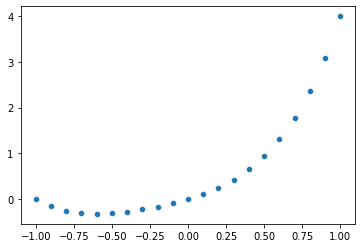

In [ ]:
sns.scatterplot(x=X, y=y)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)


In [ ]:
def _exp(x1):
    return np.exp(x1)

exp = gplearn.functions.make_function(function=_exp,
                        name='exp',
                        arity=1)

def _minus_absolute_error(y, y_pred, w):
    """Calculate the minus sum absolute error."""
    return -np.sum(np.abs(y_pred - y))

mae = gplearn.fitness.make_fitness(_minus_absolute_error, greater_is_better=True)

function_set = ['add', 'sub', 'mul', 'log', 'sin', 'cos', 'div', exp]

est_gp = SymbolicRegressor(generations=50, population_size=1000, verbose =1,
                         p_crossover=0.7, function_set=function_set,p_subtree_mutation=0,
                         p_point_mutation=0, p_hoist_mutation = 0, metric = mae)

est_gp.fit(X_train.reshape(-1, 1), y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


   0    15.44             -inf        6         -2.22797              N/A     43.45s
   1    10.41         -13.5559        8         -1.34252              N/A     33.10s
   2     9.97          -11.724        8         -1.34252              N/A     32.69s
   3     9.33          -16.547        8          -1.2376              N/A     31.87s
   4     8.44         -14.5077        8          -1.2376              N/A     30.50s
   5     7.96         -8.51187        8         -1.23598              N/A     32.35s
   6     7.91         -8.05485       10         -1.17198              N/A     29.73s
   7     8.15         -8.52457       10         -1.17198              N/A     28.72s
   8     9.18         -10.2114       12         -1.14029              N/A     27.72s
   9    10.41         -7.41504       12         -1.14029              N/A     27.06s
  10    12.04         -6.96244       12         -1.14029              N/A     27.90s
  11    12.00         -6.75766       12         -1.14029         

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'log', 'sin', 'cos', 'div',
                  generations=50,
                  metric=<gplearn.fitness._Fitness object at 0x7fe7478a98d0>,
                  p_crossover=0.7, p_hoist_mutation=0, p_point_mutation=0,
                  p_subtree_mutation=0, verbose=1)

In [ ]:
print(est_gp.run_details_.keys())

dict_keys(['generation', 'average_length', 'average_fitness', 'best_length', 'best_fitness', 'best_oob_fitness', 'generation_time'])


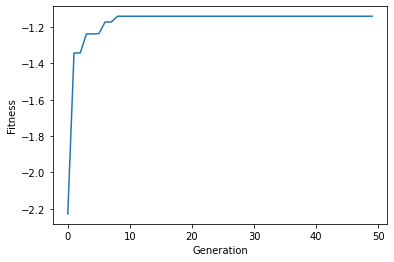

In [ ]:
# a)
x_axis = est_gp.run_details_['generation']
y_axis = est_gp.run_details_['best_fitness']
plt.plot(x_axis, y_axis)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.savefig("best_fitness")
plt.show()

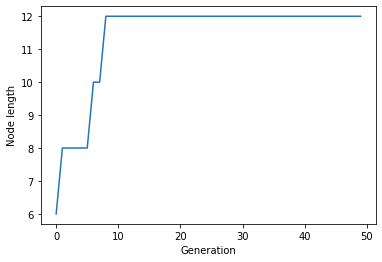

In [ ]:
# b)
x_axis = est_gp.run_details_['generation']
y_axis = est_gp.run_details_['best_length']
plt.plot(x_axis, y_axis)
plt.xlabel("Generation")
plt.ylabel("Node length")
plt.savefig("best_length")
plt.show()

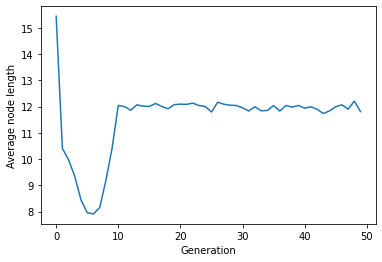

In [ ]:
# b) a)
x_axis = est_gp.run_details_['generation']
y_axis = est_gp.run_details_['average_length']
plt.plot(x_axis, y_axis)
plt.xlabel("Generation")
plt.ylabel("Average node length")
plt.savefig("average_length")
plt.show()

mul(exp(sub(X0, -0.179)), sub(sub(sub(X0, -0.013), -0.013), -0.013))
-1.1402896439659562



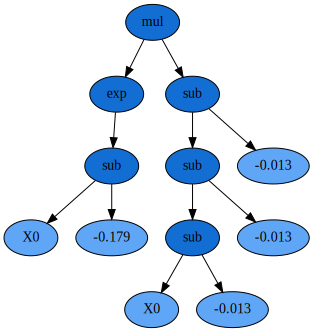

In [ ]:
print(est_gp._program)
print(est_gp._program.raw_fitness_)
print()
dot_data=est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [ ]:
est_gp._program.raw_fitness_ 

-1.1402896439659562